In [2]:
import pandas as pd
from parse import parse

In [3]:
def min_secs_to_fraction_minutes(time_string):
    min_sec_result = parse("{}m{}s", time_string)
    min, sec = tuple([int(num) for num in min_sec_result.fixed])
    return min+sec/60

In [4]:
min_secs_to_fraction_minutes("60m30s")

60.5

In [18]:
batchsize1_table = pd.DataFrame({"Método": ["Keras", 
                                            "JAX", 
                                            "JAX JIT"], 
                                 "Tempo de Treinamento (min)": [min_secs_to_fraction_minutes("10m11s"), 
                                          min_secs_to_fraction_minutes("39m23s"), 
                                          min_secs_to_fraction_minutes("8m10s")]})

<AxesSubplot:xlabel='Método'>

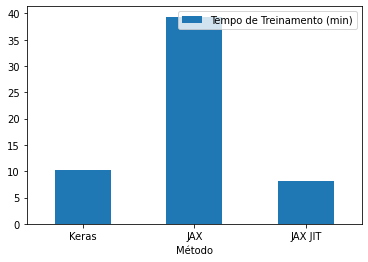

In [30]:
# batchsize1_table.plot.bar(x='Método', y='Tempo de Treinamento (min)', rot=0, title="Comparação dos Tempos de Treinamento para 40 épocas, com batch size = 1", color=["#1E90FF", "#BA55D3", "#4169E1"])
batchsize1_table.plot.bar(x='Método', y='Tempo de Treinamento (min)', rot=0)

In [ ]:
batchsize4_table = pd.DataFrame({"Método": ["Keras", 
                                            "JAX", 
                                            "JAX JIT"], 
                                 "Tempo de Treinamento (min)": [min_secs_to_fraction_minutes("10m11s"), 
                                          min_secs_to_fraction_minutes("39m23s"), 
                                          min_secs_to_fraction_minutes("8m10s")]})

In [ ]:
batchsize1_table.plot.bar(x='Método', y='Tempo de Treinamento (min)', rot=0, title="Comparação dos Tempos de Treinamento para 40 épocas, com batch size = 1", color=["#1E90FF", "#BA55D3", "#4169E1"])